In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rot_mat(angle, dir):
    if dir == 'x':
        return np.array([[1, 0, 0], [0, np.cos(angle), -np.sin(angle)], [0, np.sin(angle), np.cos(angle)]])
    if dir == 'y':
        return np.array([[np.cos(angle), 0, np.sin(angle)], [0, 1, 0], [-np.sin(angle), 0, np.cos(angle)]])
    if dir == 'z':
        return np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]])
    return

[ 0. -0.  0.]


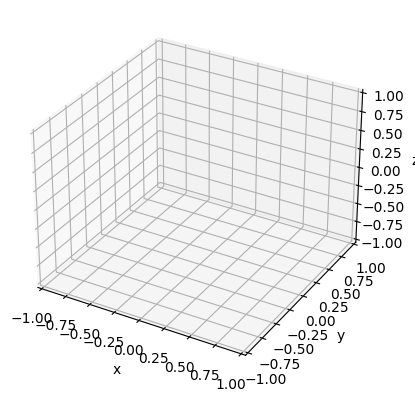

In [3]:
arm_pts_x = [0]
arm_pts_y = [0]
arm_pts_z = [0]
def shoulder2cartesian(angles, base=np.array([0, -1, 0])  ):
    # Converts shoulder angles (Flexion, adduction, rotation) to cartesian coodinates TODO:MAKE SURE TO CHECK SHOULDER ANGLE ORDER
    return rot_mat(angles[0], 'z') @ rot_mat(angles[1], 'x') @ rot_mat(angles[0], 'z').T @ rot_mat(angles[0], 'z') @ base * angles[2]
    
# def cartesian2sphere(coords):
#     # Converts cartesian coodinates to spherical coordinates
#     x = coords[0]
#     y = coords[1]
#     z = coords[2]
#     # x = coords[:, 0]
#     # y = coords[:, 1]
#     # z = coords[:, 2]
#     xz = x**2 + z**2
#     mag = np.sqrt(xz + y**2)
#     theta = np.arctan2(z, x)
#     phi = np.arctan2(np.sqrt(xz), y)
#     return theta, phi, mag


def cartesian2sphere(coords):
    # Converts cartesian coodinates to spherical coordinates
    x = coords[0]
    y = coords[1]
    z = coords[2]
    # x = coords[:, 0]
    # y = coords[:, 1]
    # z = coords[:, 2]
    xy = x**2 + y**2
    mag = np.sqrt(xy + z**2)
    theta = np.arctan2(y, x)
    phi = np.arctan2(np.sqrt(xy), z)
    
    # print("x=", x, "y=", y, "z=", z)
    # print("theta=", theta, "phi=", phi, "mag=", mag)
    return theta, phi, mag
    
# def sphere2cartesian(sp_coords):
#     # Converts spherical coodinates to cartesian coordinates
#     mag = np.sqrt(coords[0]**2 + coords[1]**2 + coords[2]**2)
#     theta = np.arctan2(coords[1], coords[0]) - np.pi
#     phi = np.arctan2(np.sqrt(coords[0]**2 + coords[1]**2), coords[2])
#     return theta, phi, mag

elbow = shoulder2cartesian(np.array([np.pi/4, -np.pi/4, 0]))
print(elbow)
arm_pts_x.append(elbow[0])
arm_pts_y.append(elbow[1])
arm_pts_z.append(elbow[2])

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(arm_pts_x, arm_pts_y, arm_pts_z, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
plt.show()

In [4]:
def generate_data(n_points, seed=0):
    return np.random.uniform(-np.pi, np.pi, (n_points, 3))

def gen_bins(low, high, res=100):
    borders = np.linspace(low - np.abs(high - low)/(2*res), high + np.abs(high - low)/(2*res), res+2)
    bins = np.linspace(low, high, res)
    # Wrap low around to avoid indexing problem
    bins = np.append(bins, [low])
    return bins, borders

data = generate_data(10)

bins, borders = gen_bins(-np.pi, np.pi, res=100)
# print(bins)
# print(borders)
indices = np.digitize(data, borders)
# print(indices)
# print(bins[indices[0, 0]-1])

test_index = np.digitize([-np.pi, np.pi], borders)
assert(bins[test_index[0]-2] == -np.pi)
assert(bins[test_index[1]-2] == np.pi)

bins, borders = gen_bins(0, np.pi, res=100)
# print(bins)
# print(borders)
test_index = np.digitize([0, np.pi], borders)
assert(bins[test_index[0]-2] == 0)
assert(bins[test_index[1]-2] == np.pi)

In [5]:
data = generate_data(10)
data = np.array([[np.pi, 0, 0]])
# print(data)

def parse_data(data, res=100):
    for i in range(len(data)):
        # data[i] = cartesian2sphere(shoulder2cartesian(data[i]))
        # print(data[i])
        # print(shoulder2cartesian(data[i]))
        data[i] = cartesian2sphere(shoulder2cartesian(data[i]))
        # print(temp)
        # data[i, 0] = temp[0]
        # data[i, 1] = temp[1]
        # data[i, 2] = temp[2]
        # print(data[i])
        
    # print(data[0])
    # print(cartesian2sphere(shoulder2cartesian(data[i])))
    theta_bins, theta_borders = gen_bins(-np.pi, np.pi, 2*res)
    phi_bins, phi_borders = gen_bins(0, np.pi, res)
    
    # print(theta_bins)
    # print(theta_borders)
    # print(phi_bins)
    # print(phi_borders)
    
    theta_indices = np.digitize(data[:, 0], theta_borders)
    phi_indices = np.digitize(data[:, 1], phi_borders)
    
    # print(theta_indices)
    # print(phi_indices)
    
    return np.stack((theta_indices, phi_indices), axis=1), data[:, 2]
    

    
print(parse_data(data))
        
        

(array([[101,   1]]), array([0.]))


In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

def ms(x, y, z, r, resolution=50):
    """Return the coordinates for plotting a sphere centered at (x,y,z)"""
    u, v = np.mgrid[-np.pi:np.pi:resolution*2j, 0:np.pi:resolution*1j]
        
    X = r * np.cos(u)*np.sin(v) + x
    Y = r * np.sin(u)*np.sin(v) + y
    Z = r * np.cos(v) + z
    return (X, Y, Z)

# data = []
res = 15
# r = np.random.uniform(0.25, 0.25, (res, res))
# for i in range(10):
#     for j in range(len(r[0])):
#         r[j, i] = 1
#         r[j, i] = 1
#         r[j, i] = 1

data = generate_data(10000)
# data = np.array([[0, 0, 0]], dtype=np.float64)
# data = np.array([[0, 0, 0]])
theta_bins, theta_borders = gen_bins(-np.pi, np.pi, 2*res)
phi_bins, phi_borders = gen_bins(0, np.pi, res)

indices, mags = parse_data(data, res)
r = np.random.uniform(0.25, 0.25, (2*res, res))

for i in range(len(indices)):
    # print(i)
    r[indices[i][0]-2, indices[i][1]-2] += mags[i]

data = []
(x_pns_surface, y_pns_surface, z_pns_surface) = ms(0, 0, 0, r, res)
data.append(go.Surface(x=x_pns_surface, y=y_pns_surface, z=z_pns_surface, opacity=1, surfacecolor=x_pns_surface**2 + y_pns_surface**2 + z_pns_surface**2))
data.append(go.Scatter3d(x = [0, 100], y = [0, 0], z = [0, 0], mode='lines', line = dict(color='red', width = 4)))
data.append(go.Scatter3d(x = [0, 0], y = [0, 100], z = [0, 0], mode='lines', line = dict(color='green', width = 4)))
data.append(go.Scatter3d(x = [0, 0], y = [0, 0], z = [0, 100], mode='lines', line = dict(color='blue', width = 4)))
px.line_3d(x = [0, 100], y = [0, 0], z = [0, 0])

fig = go.Figure(data=data)
fig.update_layout(
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=1,
                z=0
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=1 ),
        aspectmode = 'manual'
    ),
)
fig.show()